In [1]:
import os
#path = os.path.abspath(os.path.join('..','..'))
#print(path)
#import sys

#sys.path.insert(0,path)
#print(sys.executable)

from dcapy import dca
from dcapy.models import CashFlow, ChgPts, CashFlowModel, Period, Scenario

import numpy as np 
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
import seaborn as sns

In [2]:
p1_dict = {
    'name':'pdp',
    'dca': {
        'ti':'2021-01-01',
        'di':0.3,
        'freq_di':'A',
        'qi':{'dist':'norm', 'kw':{'loc':900,'scale':200}}, #[800,1000],
        'b':0,
        'fluid_rate':1200
    },
    'start':'2021-01-01',
    'end':'2027-01-01',
    'freq_input':'M',
    'freq_output':'A',
    'rate_limit': 400,
    'iter':10,
    'cashflow_params':[
        {
            'name':'capex',
            'const_value':-2000,
            'periods':1,
            'target':'capex'
        }
    ]
}

p2_dict = {
    'name':'pud',
    'dca': {
        #'ti':['2022-01-01','2022-05-01'],
        'ti':'2022-01-01',
        'di':0.3,
        'freq_di':'A',
        'qi':900,
        'b':0,
        'fluid_rate':1600
    },
    'start':'2022-01-01',
    'end':'2027-01-01',
    'freq_input':'M',
    'freq_output':'A',
    'depends':{'period':'pdp'},
    'cashflow_params':[
        {
            'name':'capex',
            'const_value':-6000,
            'periods':1,
            'target':'capex'
        }
    ]
}

p1 = Period(**p1_dict)
p2 = Period(**p2_dict)



In [3]:
d1 = dca.Arps(**{
        'ti':['2022-01-01','2022-05-01'],
        'di':[0.3,0.4],
        'freq_di':'A',
        'qi':1500,
        'b':0,
        'fluid_rate':1600
    })
d1.forecast(start=date(2022,1,1), end=date(2025,1,1)).head()

/home/scuervo91/dev/apps/dcapy/dcapy/dca/arps.py:63: RuntimeWarning: divide by zero encountered in true_divide
  return qi/np.power(1+b*di*time_array,1/b)
/home/scuervo91/dev/apps/dcapy/dcapy/dca/arps.py:80: RuntimeWarning: divide by zero encountered in true_divide
  g = np.power(b*di*time_array+1,(b-1)/b)
/home/scuervo91/dev/apps/dcapy/dcapy/dca/arps.py:81: RuntimeWarning: divide by zero encountered in true_divide
  h = np.power(b*di*ti+1,(b-1)/b)


,oil_rate,oil_cum,iteration,oil_volume,fluid_rate,water_rate,bsw,wor,water_cum,fluid_cum,water_volume,fluid_volume
date,,,,,,,,,,,,
2022-01,1500.000000,0.000000,0,0.000000,1600.0,100.000000,0.062500,0.066667,0.000000,0.0,0.000000,0.0
2022-02,1462.263615,45912.602173,0,45912.602173,1600.0,137.736385,0.086085,0.094194,4269.827946,49600.0,4269.827946,49600.0
2022-03,1428.995797,86388.447509,0,40475.845337,1600.0,171.004203,0.106878,0.119667,9057.945642,94400.0,4788.117696,44800.0
2022-04,1393.045706,130127.724519,0,43739.277010,1600.0,206.954294,0.129346,0.148562,15473.528760,144000.0,6415.583118,49600.0
2022-05,1359.116656,171408.068452,0,41280.343934,1600.0,240.883344,0.150552,0.177235,22700.029078,192000.0,7226.500318,48000.0


In [4]:
qi = [400,500]
di = 0.3
b = 0
ti = [date(2021,2,1), date(2021,4,1)]
di_f = 'A'
fluid_rate = [1000,1200,1300,1200,1300,1200]
dc = dca.Arps(qi=qi,di=di,b=b,ti=ti,freq_di=di_f, fluid_rate=fluid_rate)
print(dc.forecast(start=date(2021,2,1), end=date(2021,7,1), freq_output='M'))

           oil_rate       oil_cum  iteration    oil_volume  fluid_rate  \
date                                                                     
2021-02  400.000000      0.000000          0      0.000000      1000.0   
2021-03  390.899639  11072.106269          0  11072.106269      1200.0   
2021-04  381.065546  23036.919336          0  11964.813067      1300.0   
2021-05  371.784305  34329.094979          0  11292.175643      1200.0   
2021-06  362.431108  45708.818254          0  11379.723275      1300.0   
2021-07  353.603729  56448.796662          0  10739.978408      1200.0   
2021-05  487.821990  14816.579154          1  14816.579154      1200.0   
2021-06  475.549564  29748.030452          1  14931.451297      1300.0   
2021-07  463.967069  43840.065966          1  14092.035514      1200.0   

         water_rate       bsw       wor      water_cum  fluid_cum  \
date                                                                
2021-02  600.000000  0.600000  1.500000       0

In [5]:
s1 = Scenario(name='base', periods=[p1,p2])
s1

Scenario(name='base', periods=[Period(name='pdp', dca=Declination 
 Ti: 2021-01-01 
 Qi: dist='norm' kw={'loc': 900, 'scale': 200} bbl/d 
 Di: 0.3 A 
 b: 0.0, start=datetime.date(2021, 1, 1), end=datetime.date(2027, 1, 1), time_list=None, freq_input='M', freq_output='A', rate_limit=400.0, cum_limit=None, iter=10, ppf=None, cashflow_params=[CashFlowParams(name='capex', const_value=-2000.0, periods=1, array_values=None, target='capex', multiply=None, agg='sum', wi=1, depends=False)], cashflow=None, depends=None, forecast=None), Period(name='pud', dca=Declination 
 Ti: 2022-01-01 
 Qi: 900.0 bbl/d 
 Di: 0.3 A 
 b: 0.0, start=datetime.date(2022, 1, 1), end=datetime.date(2027, 1, 1), time_list=None, freq_input='M', freq_output='A', rate_limit=None, cum_limit=None, iter=1, ppf=None, cashflow_params=[CashFlowParams(name='capex', const_value=-6000.0, periods=1, array_values=None, target='capex', multiply=None, agg='sum', wi=1, depends=False)], cashflow=None, depends=Depends(period='pdp', delay

In [6]:
fore1 = s1.generate_forecast()

/home/scuervo91/dev/apps/dcapy/dcapy/dca/arps.py:240: RuntimeWarning: invalid value encountered in true_divide
  (np.power(qi / rate, b) - 1)/(b * di)
/home/scuervo91/dev/apps/dcapy/dcapy/dca/arps.py:63: RuntimeWarning: divide by zero encountered in true_divide
  return qi/np.power(1+b*di*time_array,1/b)
/home/scuervo91/dev/apps/dcapy/dcapy/dca/arps.py:80: RuntimeWarning: divide by zero encountered in true_divide
  g = np.power(b*di*time_array+1,(b-1)/b)
/home/scuervo91/dev/apps/dcapy/dcapy/dca/arps.py:81: RuntimeWarning: divide by zero encountered in true_divide
  h = np.power(b*di*ti+1,(b-1)/b)
/home/scuervo91/dev/apps/dcapy/dcapy/dca/arps.py:63: RuntimeWarning: divide by zero encountered in true_divide
  return qi/np.power(1+b*di*time_array,1/b)
/home/scuervo91/dev/apps/dcapy/dcapy/dca/arps.py:80: RuntimeWarning: divide by zero encountered in true_divide
  g = np.power(b*di*time_array+1,(b-1)/b)
/home/scuervo91/dev/apps/dcapy/dcapy/dca/arps.py:81: RuntimeWarning: divide by zero enco

<AxesSubplot:xlabel='date', ylabel='oil_rate'>

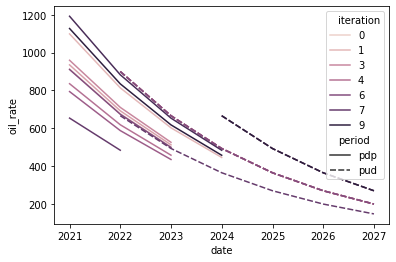

In [7]:
sns.lineplot(data=fore1,  x=fore1.index.to_timestamp(), y='oil_rate', hue='iteration', style='period')

<AxesSubplot:xlabel='date', ylabel='oil_rate'>

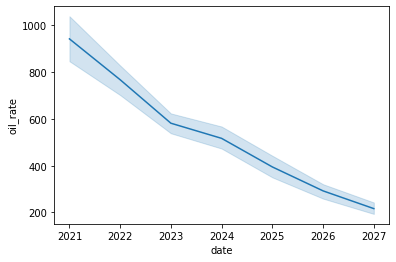

In [8]:
sns.lineplot(data=fore1,  x=fore1.index.to_timestamp(), y='oil_rate')

In [19]:
c1 = s1.generate_cashflow()
c1[9].fcf()

,capex,capex,total_capex,total_income,total_opex,fcf,cum_fcf
2021,-2000.0,0.0,-2000.0,0,0,-2000.0,-2000.0
2024,0.0,-6000.0,-6000.0,0,0,-6000.0,-8000.0


In [10]:
c1[8].fcf()

,capex,capex,total_capex,total_income,total_opex,fcf,cum_fcf
2021,-2000.0,0.0,-2000.0,0,0,-2000.0,-2000.0
2024,0.0,-6000.0,-6000.0,0,0,-6000.0,-8000.0


In [11]:
fore1['iteration'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])